In [1]:
import pandas as pd

In [2]:
injections_per_fm = 100

In [3]:
df = pd.read_csv("./results_stdout.csv")
df.columns = ["Group", "Type", *df.columns[2:]]
df

,Group,Type,Output error,Classification error,Other error
0,fp32,FLIP_SINGLE_BIT,7.0,0.0,0.0
1,fp32,FLIP_TWO_BITS,13.0,1.0,0.0
2,fp32,RANDOM_VALUE,45.0,17.0,0.0
3,fp32,ZERO_VALUE,15.0,0.0,0.0
4,gp,FLIP_SINGLE_BIT,16.0,3.0,1.0
5,gp,FLIP_TWO_BITS,7.0,1.0,2.0
6,gp,RANDOM_VALUE,41.0,5.0,4.0
7,gp,ZERO_VALUE,14.0,0.0,4.0


<Axes: title={'center': 'GP error measurements'}, xlabel='Type', ylabel='error rate %'>

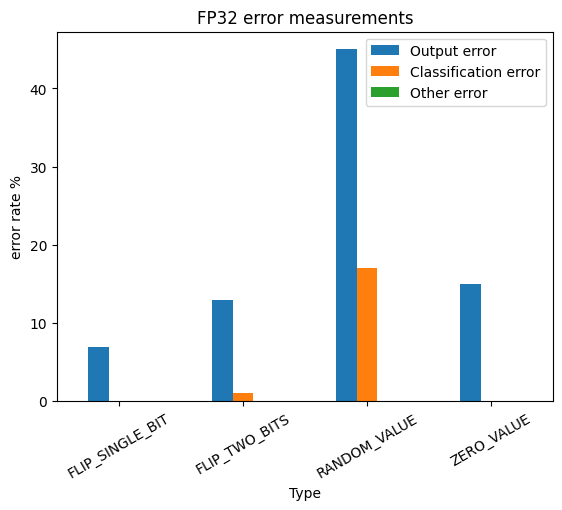

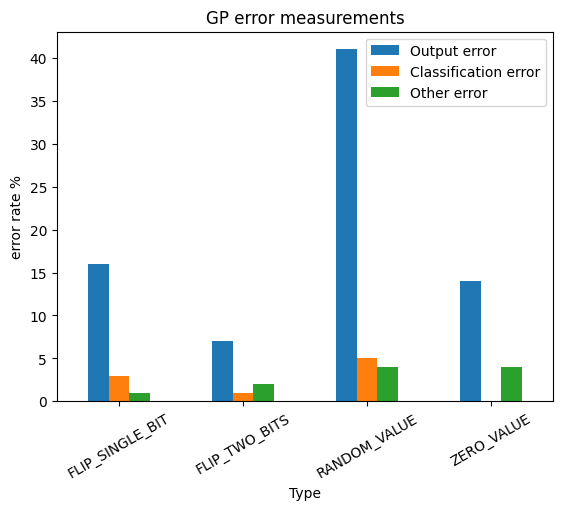

In [4]:
df_fp32 = df[df["Group"] == "fp32"]
df_gp = df[df["Group"] == "gp"]
df_fp32.index = df_fp32["Type"]
df_gp.index = df_gp["Type"]
df_fp32.plot(kind="bar", ylabel="error rate %", title="FP32 error measurements", rot=30)
df_gp.plot(kind="bar", ylabel="error rate %", title="GP error measurements", rot=30)

In [5]:
df_kernels = pd.read_csv("./results_kernel.csv")
df_kernels.columns = ["Kernel", *df_kernels.columns[1:]]
df_kernels

,Kernel,Output error,Classification error,Masked,Other error
0,voidattention_kernel_batched<AttentionKernel<f...,23,9,124,2
1,volta_sgemm_128x64_tn,132,18,502,9
2,voidat::native::vectorized_elementwise_kernel<...,0,0,2,0
3,cudnn_volta_scudnn_128x64_relu_xregs_large_nn_v1,0,0,1,0
4,voidat::native::vectorized_elementwise_kernel<...,2,0,0,0
5,voidat::native::(anonymousnamespace)::vectoriz...,1,0,1,0
6,"voidat::native::elementwise_kernel<128,2,at::n...",0,0,1,0


<Axes: xlabel='Kernel'>

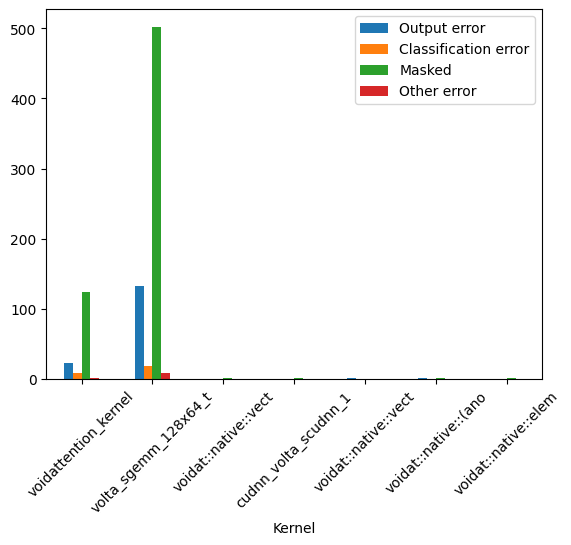

In [6]:
df_kernels.index = pd.Series([k[:20] for k in df_kernels["Kernel"]], name="Kernel")
df_kernels.plot(kind="bar", rot=45,)

In [7]:
df_kernel_bfm = pd.read_csv("./results_kernel_bfm.csv")
df_kernel_bfm

,Unnamed: 0,Unnamed: 1,ZERO_VALUE,FLIP_TWO_BITS,RANDOM_VALUE
0,fp32,voidattention_kernel_batched<AttentionKernel<f...,"{'Output error': 1, 'Classification error': 0,...",NaN,NaN
1,fp32,volta_sgemm_128x64_tn,"{'Output error': 14, 'Classification error': 0...",NaN,NaN
2,gp,volta_sgemm_128x64_tn,"{'Output error': 11, 'Classification error': 0...",NaN,NaN
3,gp,voidattention_kernel_batched<AttentionKernel<f...,"{'Output error': 2, 'Classification error': 0,...",NaN,NaN
4,gp,voidat::native::vectorized_elementwise_kernel<...,"{'Output error': 1, 'Classification error': 0,...",NaN,NaN
5,fp32,voidat::native::vectorized_elementwise_kernel<...,NaN,"{'Output error': 0, 'Classification error': 0,...",NaN
6,fp32,cudnn_volta_scudnn_128x64_relu_xregs_large_nn_v1,NaN,"{'Output error': 0, 'Classification error': 0,...",NaN
7,gp,"voidat::native::elementwise_kernel<128,2,at::n...",NaN,"{'Output error': 0, 'Classification error': 0,...",NaN
8,gp,voidat::native::(anonymousnamespace)::vectoriz...,NaN,NaN,"{'Output error': 0, 'Classification error': 0,..."
9,gp,voidat::native::vectorized_elementwise_kernel<...,NaN,NaN,"{'Output error': 0, 'Classification error': 0,..."
